# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [2]:
import pandas as pd
import numpy as np

In [32]:
%matplotlib notebook  

In [33]:
#import matplotlib.pyplot as plt

import pylab as plt

plt.rcParams['figure.figsize']=(6, 3)   # tamaño de los graficos

In [34]:
import seaborn as sns  

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [5]:
temp=pd.read_csv('Temp_States.csv')

#### Print `temp`

In [6]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [7]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes


Estamos viendo para distintas ciudades cual es su temperatura, también nos dice en que estado se encuentra la ciudad. Las dos primeras columnas son objetos ya que son los nombres de las ciudades y la tercera son floats.

#### Select the rows where state is New York

In [13]:
ny=temp[temp.State=="New York"]

In [14]:
ny

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [17]:
ny.Temperature.mean()

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [20]:
temp[['City','State']][temp.Temperature>15]

,City,State
0,NYC,New York
3,Hartford,Connecticut
5,Treton,New Jersey
6,Newark,New Jersey


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [21]:
temp['City'][temp.Temperature>15]

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [26]:
temp['City'][(temp.Temperature<20) & (temp.Temperature>15)]


0         NYC
3    Hartford
Name: City, dtype: object

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [27]:
temp.groupby("State").agg({"Temperature":"std"})

,Temperature
State,
Connecticut,1.964186
New Jersey,1.571348
New York,8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [28]:
employee=pd.read_csv('employee.csv')

#### Explore the data types of the Temp dataframe. Comment your results

In [39]:
employee.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


We have information about various employees, including their role, education and salary. There are no nulls and its all object except years and salary that are integers

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

<IPython.core.display.Javascript object>


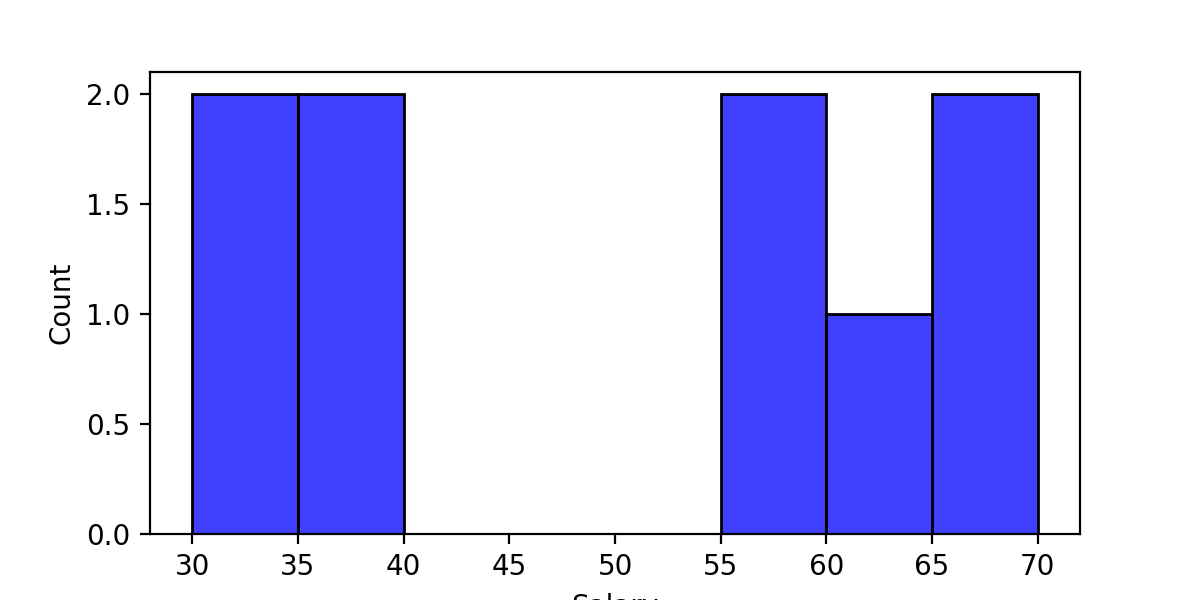

In [41]:
sns.histplot(x=employee.Salary, color='b',bins=8);

We see how the salaries are distributed among the employees

#### What's the average salary in this company?

In [43]:
employee.Salary.mean()

48.888888888888886

#### What's the highest salary?

In [44]:
max(employee.Salary)

70

#### What's the lowest salary?

In [45]:
min(employee.Salary)

30

#### Who are the employees with the lowest salary?

In [47]:
employee.Name[employee.Salary==min(employee.Salary)]

1    Maria
2    David
Name: Name, dtype: object

#### Could you give all the information about an employee called David?

In [51]:
employee[employee["Name"]=="David"]

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [52]:
employee.Salary[employee["Name"]=="David"]

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [54]:
employee[employee.Title=="associate"]

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [55]:
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [58]:
employee.iloc[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [59]:
employee[(employee.Title=="associate")&(employee.Salary>55)]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [60]:
employee.groupby("Years").agg({"Salary":"mean"})

,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [62]:
employee.groupby("Title").agg({"Salary":"mean"})

,Salary
Title,
VP,70.000000
analyst,32.500000
associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

<IPython.core.display.Javascript object>


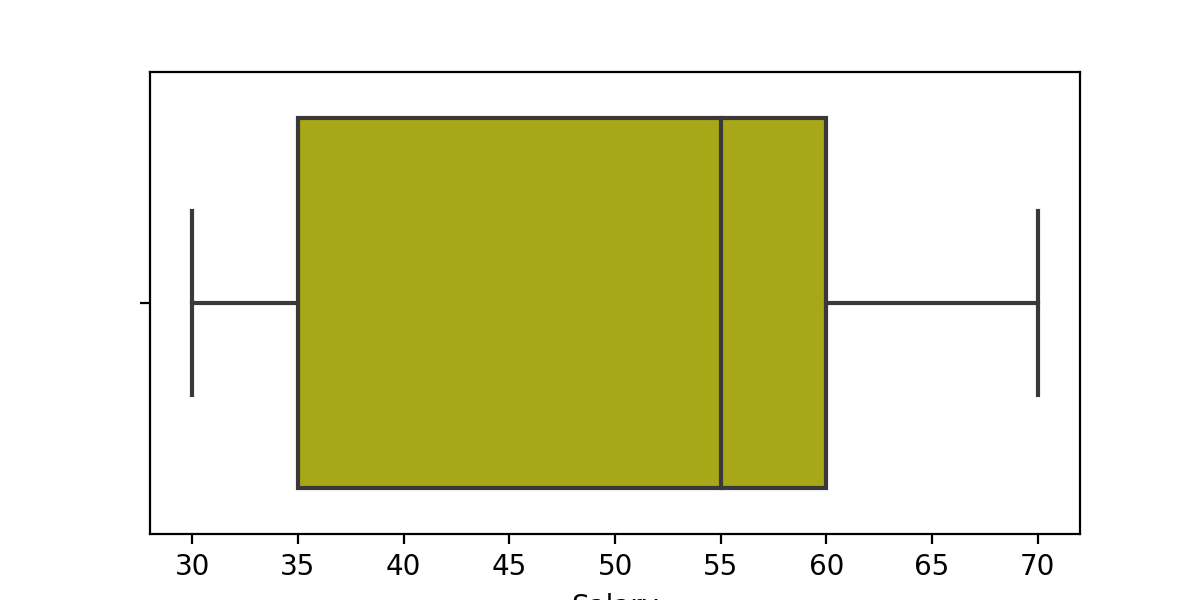

In [155]:
sns.boxplot(x=employee.Salary, color='y');

In [72]:
np.quantile(employee.Salary, 0.25) 

35.0

In [73]:
np.quantile(employee.Salary, 0.75) 

60.0

#### Is the mean salary per gender different?

In [75]:
employee.groupby("Gender").agg({"Salary":"mean"})

,Salary
Gender,
F,47.5
M,50.0


Yes, the salary of men is higher on average than that of women

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [79]:
employee.groupby("Department").agg({"Years":"max","Salary":"max"})

,Years,Salary
Department,,
HR,8,70
IT,8,70
Sales,3,55


In [ ]:
employee.groupby("Department").agg({"Years":"min","Salary":"min"})

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [32]:
# your answer here

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [83]:
import zipfile

zf=zipfile.ZipFile('Orders.zip')

oders=pd.read_csv('Orders.csv')



In [85]:
orders=pd.read_csv('Orders.csv')

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [89]:
orders.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,397924.0,278465.221859,152771.368303,0.0,148333.75,284907.50,410079.25,541908.00
InvoiceNo,397924.0,560617.126645,13106.167695,536365.0,549234.00,561893.00,572090.00,581587.00
year,397924.0,2010.934259,0.247829,2010.0,2011.00,2011.00,2011.00,2011.00
month,397924.0,7.612537,3.416527,1.0,5.00,8.00,11.00,12.00
day,397924.0,3.614555,1.928274,1.0,2.00,3.00,5.00,7.00
hour,397924.0,12.728247,2.273535,6.0,11.00,13.00,14.00,20.00
Quantity,397924.0,13.021823,180.420210,1.0,2.00,6.00,12.00,80995.00
UnitPrice,397924.0,3.116174,22.096788,0.0,1.25,1.95,3.75,8142.75
CustomerID,397924.0,15294.315171,1713.169877,12346.0,13969.00,15159.00,16795.00,18287.00
amount_spent,397924.0,22.394749,309.055588,0.0,4.68,11.80,19.80,168469.60


In [92]:
orders.head(3)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00


We have  a list of invoices from the sale of several items with information on each of the sales

####  What is the average Purchase Price?

In [94]:
orders.amount_spent.mean()

22.39474850474768

#### What were the highest and lowest purchase prices? 

In [95]:
orders.amount_spent.max()

168469.6

In [97]:
orders.amount_spent.min()

0.0

#### Select all the customers we have in Spain

In [98]:
orders.CustomerID[orders.Country=="Spain"]

4250      12557
4251      12557
4252      12557
4253      12557
4254      12557
          ...  
394733    17097
394734    17097
394735    17097
394736    17097
394737    17097
Name: CustomerID, Length: 2485, dtype: int64

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [105]:
orders.Country[orders.Country=="Spain"].value_counts()

Spain    2485
Name: Country, dtype: int64

#### Select all the customers who have bought more than 50 items ?

In [106]:
orders.CustomerID[orders.Quantity>50]

46        13748
83        15291
96        14688
102       14688
174       16029
          ...  
397720    18102
397721    16626
397729    16626
397761    15311
397882    13777
Name: CustomerID, Length: 11609, dtype: int64

#### Select orders from Spain that are above 50 items

In [108]:
orders[(orders.Country=="Spain") & (orders.Quantity>50)].head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### Select all free orders

In [110]:
orders[orders.UnitPrice==0].head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [143]:
orders[orders.Description.str.contains("lunch bag")].head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [145]:
orders[(orders.year==2011) & (orders.Description.str.contains("lunch bag"))].head(3)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.5
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.5
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.3


#### Show the frequency distribution of the amount spent in Spain.

<IPython.core.display.Javascript object>


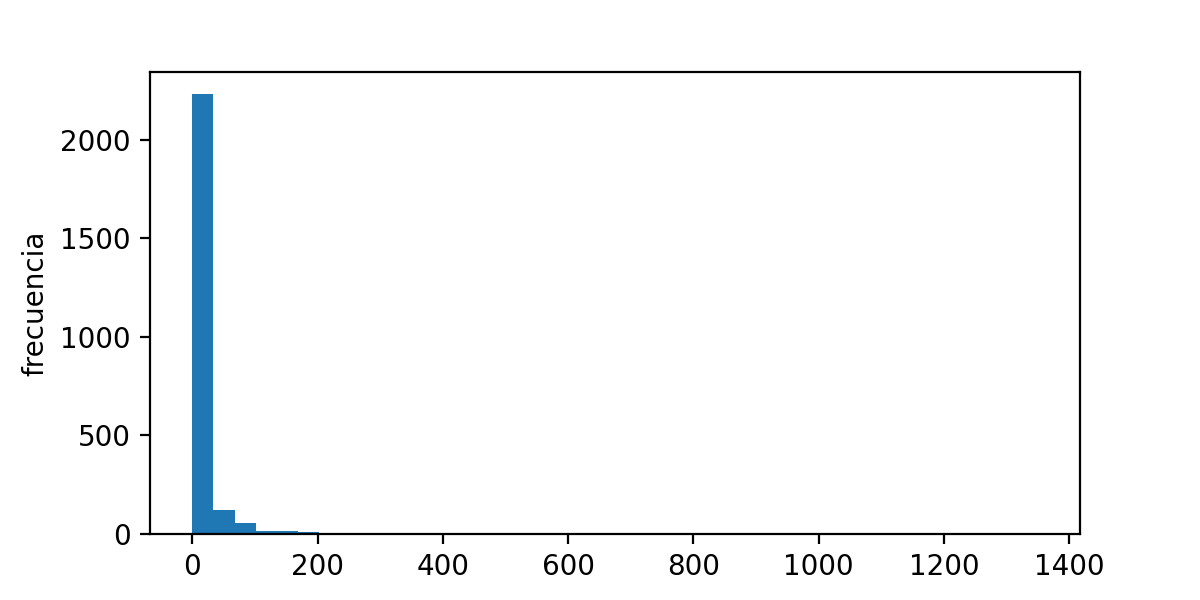

In [167]:
plt.hist(orders.amount_spent[(orders.Country=="Spain")], bins=40)
plt.ylabel('frecuencia')
plt.show();


#### Select all orders made in the month of August

In [157]:
orders[orders.month==8].head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [162]:
orders.Country[orders.month==8].value_counts()

United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: Country, dtype: int64

#### What's the  average amount of money spent by country

In [164]:
orders.groupby("Country").agg({"amount_spent":"mean"}).head(5)

,amount_spent
Country,
Australia,116.895620
Austria,25.624824
Bahrain,32.258824
Belgium,20.283772
Brazil,35.737500


#### What's the most expensive item?

In [165]:
orders.UnitPrice.max()

8142.75

#### What was the average amount spent per year ?

In [166]:
orders.groupby("year").agg({"amount_spent":"mean"}).head(5)

,amount_spent
year,
2010,21.892733
2011,22.430074
